In [1]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [95]:
data = pd.read_csv("dataset.csv")

In [96]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [97]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [98]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [99]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
data['sex']=data['sex'].map({'male':1,'female':0})
data[["bmi", "age","charges"]] = min_max_scaler.fit_transform(data[["bmi", "age","charges"]])
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'northeast':0, 'southeast':1, 'southwest':2, 'northwest':3})

data.to_csv('normalized_data.csv', index=False)
    

In [100]:
x=data.drop(['charges'], axis=1)
x.reset_index()
x

,age,sex,bmi,children,smoker,region
0,0.021739,0,0.321227,0,1,2
1,0.000000,1,0.479150,1,0,1
2,0.217391,1,0.458434,3,0,1
3,0.326087,1,0.181464,0,0,3
4,0.304348,1,0.347592,0,0,3
...,...,...,...,...,...,...
1333,0.695652,1,0.403820,3,0,3
1334,0.000000,0,0.429379,0,0,0
1335,0.000000,0,0.562012,0,0,1
1336,0.065217,0,0.264730,0,0,2


In [101]:
y=data['charges']
y.reset_index()
y

0       0.251611
1       0.009636
2       0.053115
3       0.333010
4       0.043816
          ...   
1333    0.151299
1334    0.017305
1335    0.008108
1336    0.014144
1337    0.447249
Name: charges, Length: 1338, dtype: float64

In [102]:
x

,age,sex,bmi,children,smoker,region
0,0.021739,0,0.321227,0,1,2
1,0.000000,1,0.479150,1,0,1
2,0.217391,1,0.458434,3,0,1
3,0.326087,1,0.181464,0,0,3
4,0.304348,1,0.347592,0,0,3
...,...,...,...,...,...,...
1333,0.695652,1,0.403820,3,0,3
1334,0.000000,0,0.429379,0,0,0
1335,0.000000,0,0.562012,0,0,1
1336,0.065217,0,0.264730,0,0,2


In [103]:
y

0       0.251611
1       0.009636
2       0.053115
3       0.333010
4       0.043816
          ...   
1333    0.151299
1334    0.017305
1335    0.008108
1336    0.014144
1337    0.447249
Name: charges, Length: 1338, dtype: float64

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [105]:
##applying machine learning linear regression
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
y_predicted_linear=linear_reg.predict(X_test)
r2score =r2_score(y_test,y_predicted_linear)
r2score

0.7809227350368881

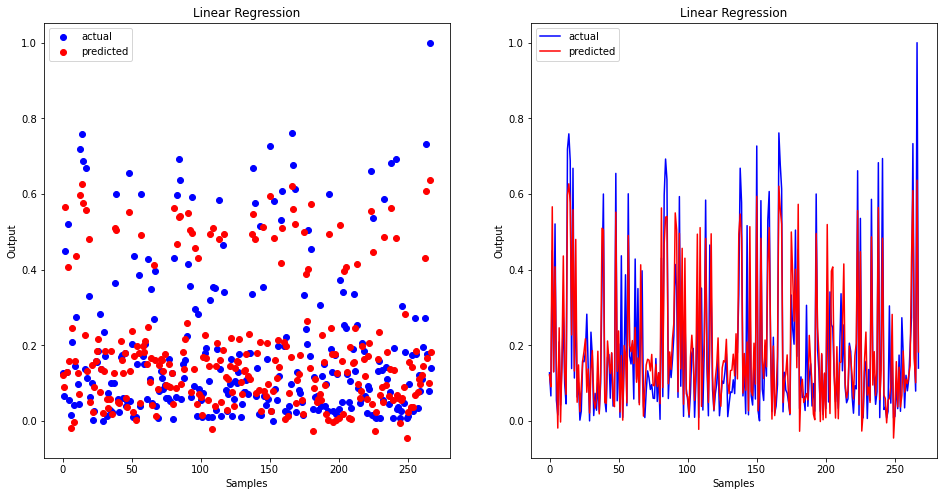

In [106]:
#analyzing results of linear regression
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(range(len(y_test)), y_test, color='blue',label='actual')
plt.scatter(range(len(y_predicted_linear)), y_predicted_linear, color='red',label='predicted')
plt.xlabel("Samples")
plt.ylabel("Output")
plt.title("Linear Regression")
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(len(y_test)), y_test, color='blue',label='actual')
plt.plot(range(len(y_predicted_linear)), y_predicted_linear, color='red',label='predicted')
plt.xlabel("Samples")
plt.ylabel("Output")
plt.title("Linear Regression")
plt.legend()
plt.show()

In [107]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
tree=DecisionTreeRegressor()   
tree.fit(X_train,y_train)
y_pred_tree=tree.predict(X_test)
r2_tree =r2_score(y_test,y_pred_tree)
r2_tree

0.7573182279782485

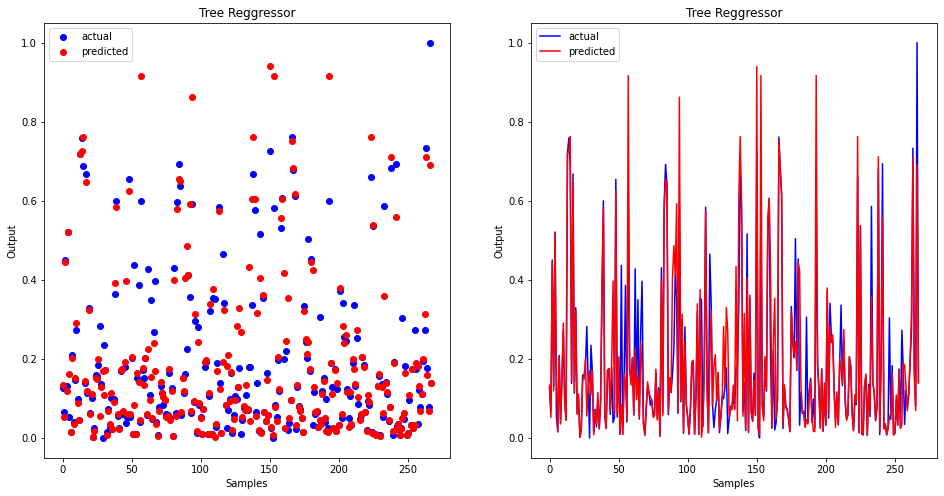

In [108]:
#analyzing results of tree reggressor
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(range(len(y_test)), y_test, color='blue',label='actual')
plt.scatter(range(len(y_pred_tree)), y_pred_tree, color='red',label='predicted')
plt.xlabel("Samples")
plt.ylabel("Output")
plt.title("Tree Reggressor")
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(len(y_test)), y_test, color='blue',label='actual')
plt.plot(range(len(y_pred_tree)), y_pred_tree, color='red',label='predicted')
plt.xlabel("Samples")
plt.ylabel("Output")
plt.title("Tree Reggressor")
plt.legend()
plt.show()

In [109]:
from sklearn.svm import SVR
svr_reg = SVR(kernel="linear")
svr_reg.fit(X_train,y_train)
y_pred_svr=svr_reg.predict(X_test)
r2_svr=r2_score(y_test,y_pred_svr)
r2_svr

0.7620344995666248

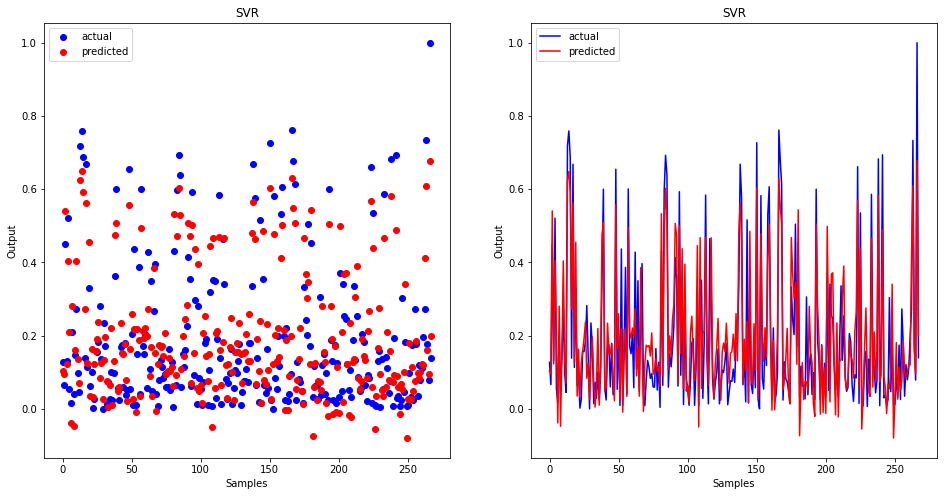

In [110]:
#analyzing results of SVR
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(range(len(y_test)), y_test, color='blue',label='actual')
plt.scatter(range(len(y_pred_svr)), y_pred_svr, color='red',label='predicted')
plt.xlabel("Samples")
plt.ylabel("Output")
plt.title("SVR")
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(len(y_test)), y_test, color='blue',label='actual')
plt.plot(range(len(y_pred_svr)), y_pred_svr, color='red',label='predicted')
plt.xlabel("Samples")
plt.ylabel("Output")
plt.title("SVR")
plt.legend()
plt.show()

In [111]:
#changing continious to categorical value 
#taking the average
data["charges"].describe()

count    1338.000000
mean        0.193916
std         0.193301
min         0.000000
25%         0.057757
50%         0.131849
75%         0.247700
max         1.000000
Name: charges, dtype: float64

In [112]:
#for charges > mean (value=1) and charges <= mean (value=0)
parameter = [
                (data["charges"]>data["charges"].mean()) & (data["charges"] != 0), 
                (data["charges"]<=data["charges"].mean()) & (data["charges"] != 0), 
                
                
                

]


values = [1,0]
data["charges_new"]=np.select(parameter,values)
data

,age,sex,bmi,children,smoker,region,charges,charges_new
0,0.021739,0,0.321227,0,1,2,0.251611,1
1,0.000000,1,0.479150,1,0,1,0.009636,0
2,0.217391,1,0.458434,3,0,1,0.053115,0
3,0.326087,1,0.181464,0,0,3,0.333010,1
4,0.304348,1,0.347592,0,0,3,0.043816,0
...,...,...,...,...,...,...,...,...
1333,0.695652,1,0.403820,3,0,3,0.151299,0
1334,0.000000,0,0.429379,0,0,0,0.017305,0
1335,0.000000,0,0.562012,0,0,1,0.008108,0
1336,0.065217,0,0.264730,0,0,2,0.014144,0


In [113]:
data.to_csv('categorical_normalization.csv', index=False)
y_new = data["charges_new"]
X_train,X_test,y_train,y_test = train_test_split(x,y_new,test_size=0.2,random_state=42)


In [114]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_tree = clf.predict(X_test)
metrics.accuracy_score(y_test, y_tree)

0.8731343283582089

In [127]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = confusion_matrix(y_test, y_tree)

matrix

array([[170,  19],
       [ 15,  64]], dtype=int64)

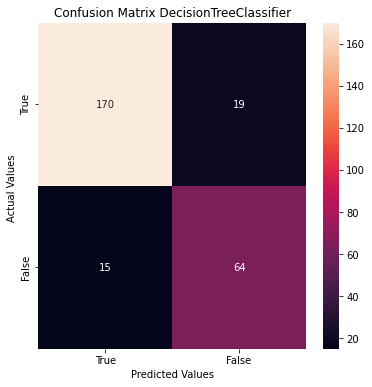

In [128]:
import seaborn as sns
plt.figure(figsize=(6,6))
mx = sns.heatmap(matrix, annot=True,fmt='g')

mx.set_title('Confusion Matrix DecisionTreeClassifier');
mx.set_xlabel('Predicted Values')
mx.set_ylabel('Actual Values ');

mx.xaxis.set_ticklabels(['True','False'])
mx.yaxis.set_ticklabels(['True','False'])

plt.show()

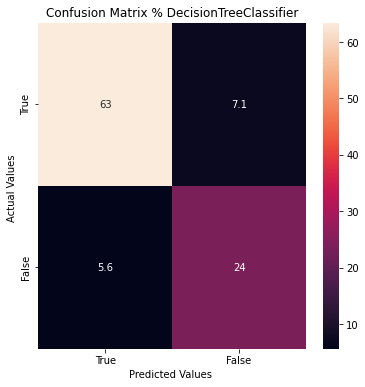

In [129]:
import seaborn as sns
plt.figure(figsize=(6,6))
mx = sns.heatmap(matrix/np.sum(matrix)*100, annot=True)

mx.set_title('Confusion Matrix % DecisionTreeClassifier');
mx.set_xlabel('Predicted Values ')
mx.set_ylabel('Actual Values ');

mx.xaxis.set_ticklabels(['True','False'])
mx.yaxis.set_ticklabels(['True','False'])

plt.show()

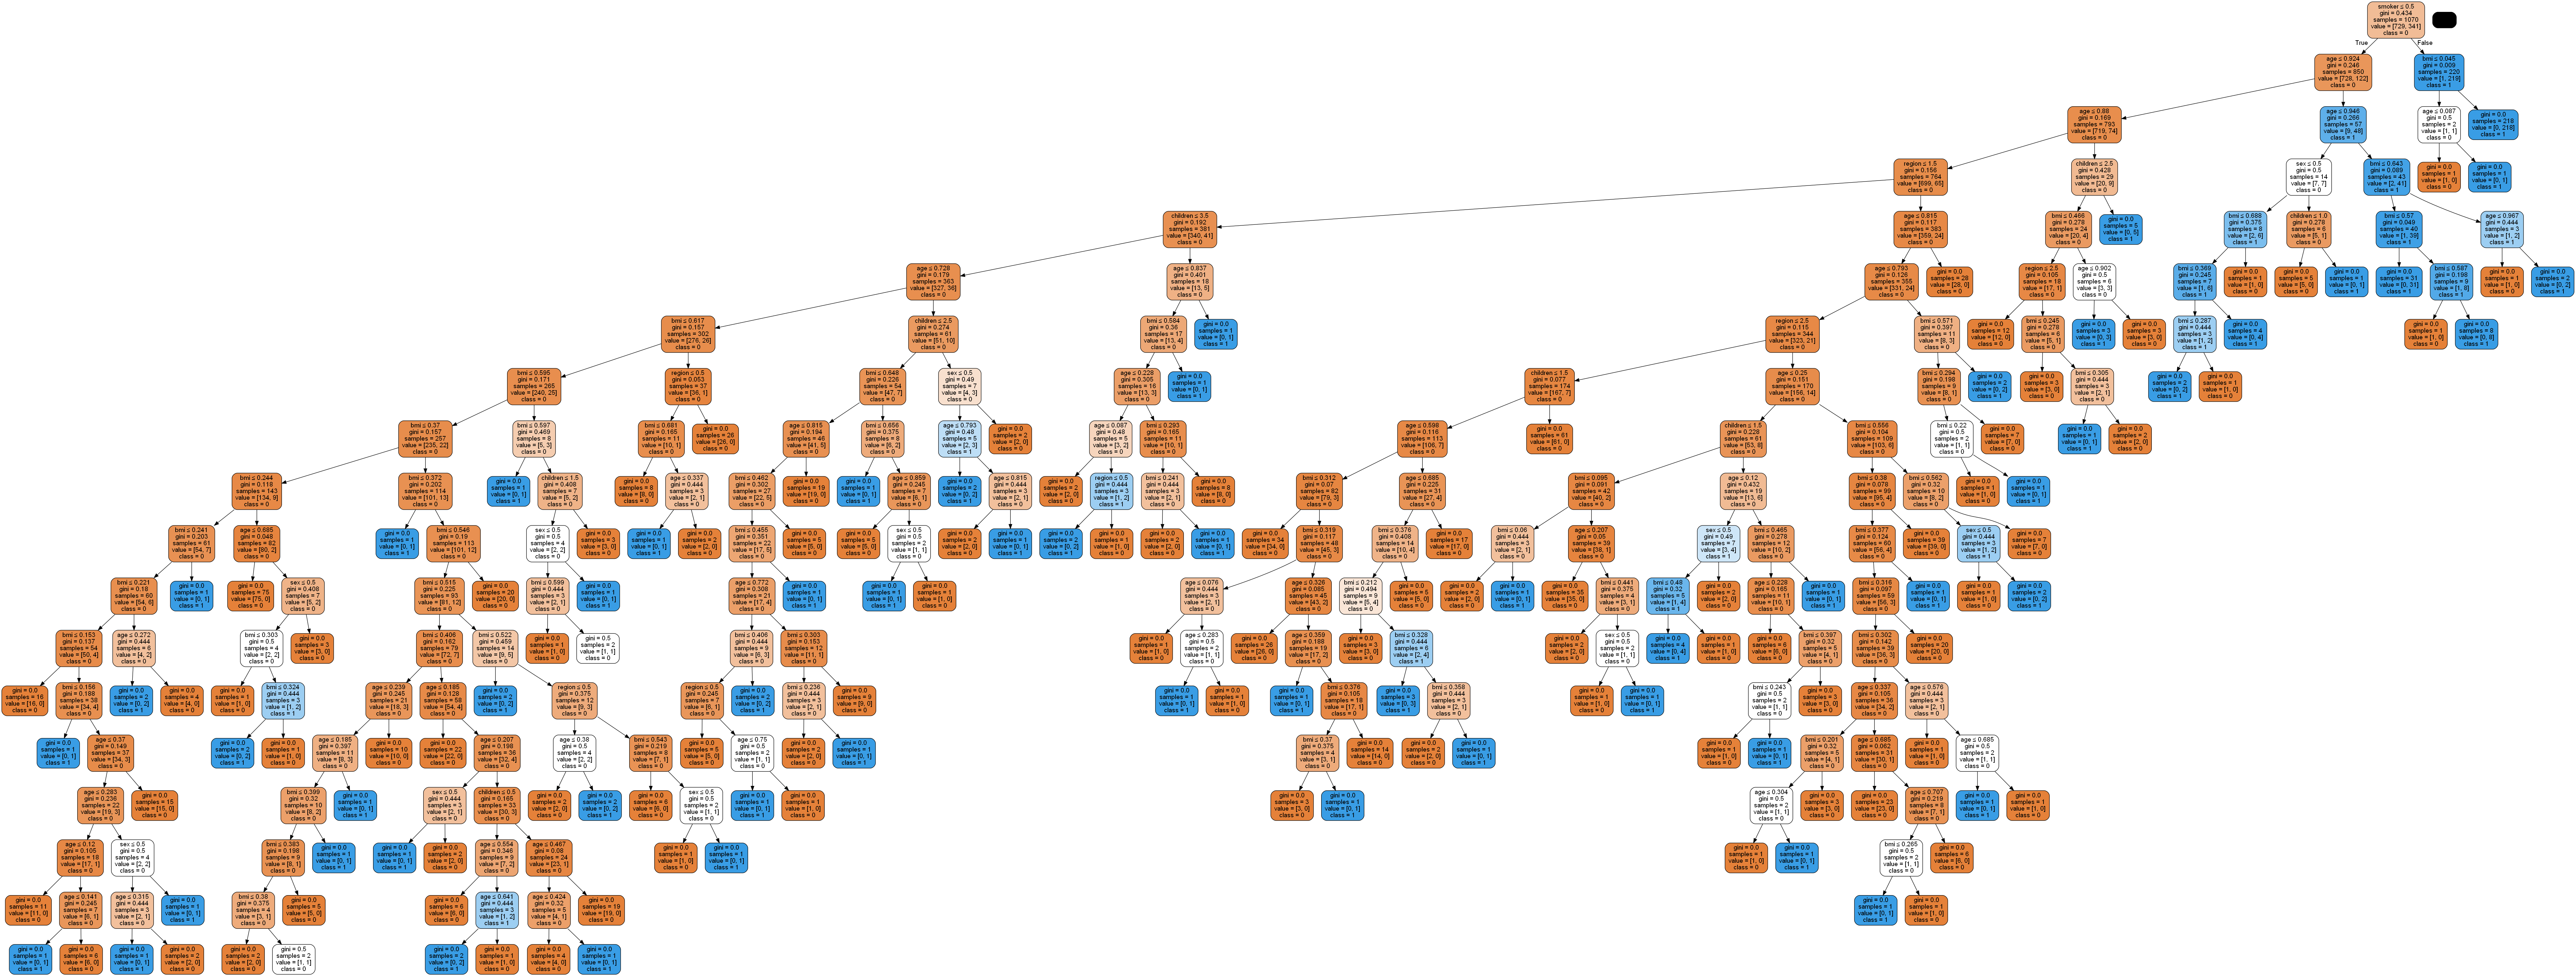

In [130]:
import graphviz
from IPython.display import Image  
from sklearn.tree import export_graphviz
from six import StringIO
features=['age','sex','bmi','children','smoker','region']
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cost_pred.png')
Image(graph.create_png())

In [131]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [132]:
y_pred_knn = classifier.predict(X_test)

In [133]:
ac = metrics.accuracy_score(y_test, y_pred_knn)
ac

0.8955223880597015

In [134]:
mat = confusion_matrix(y_test,y_pred_knn)
mat

array([[181,   8],
       [ 20,  59]], dtype=int64)

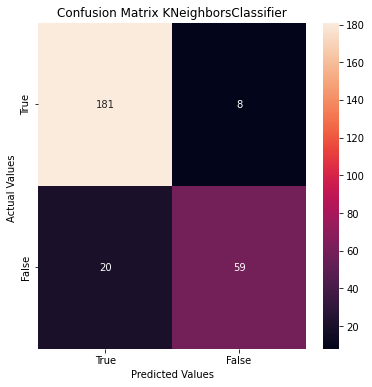

In [137]:
plt.figure(figsize=(6,6))
mx = sns.heatmap(mat, annot=True,fmt='g')
mx.set_title('Confusion Matrix KNeighborsClassifier');
mx.set_xlabel('Predicted Values')
mx.set_ylabel('Actual Values ');

mx.xaxis.set_ticklabels(['True','False'])
mx.yaxis.set_ticklabels(['True','False'])

plt.show()

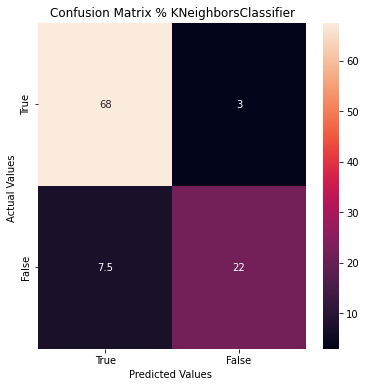

In [138]:
plt.figure(figsize=(6,6))
mx = sns.heatmap(mat/np.sum(matrix)*100, annot=True)
mx.set_title('Confusion Matrix % KNeighborsClassifier');
mx.set_xlabel('Predicted Values ')
mx.set_ylabel('Actual Values ');

mx.xaxis.set_ticklabels(['True','False'])
mx.yaxis.set_ticklabels(['True','False'])

plt.show()